<a href="https://colab.research.google.com/github/Dimmas/test_tasks/blob/main/policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("drive/MyDrive/Colab Notebooks/data.txt", delimiter = ";")
features =  ['DATA_TYPE','POLICY_IS_RENEWED', 'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_IN_CREDIT', 'VEHICLE_SUM_INSURED', 'CLIENT_HAS_OSAGO', 'CLIENT_HAS_DAGO', 'POLICY_PRICE_CHANGE', 'POLICY_COURT_SIGN', 'POLICY_HAS_COMPLAINTS', 'POLICY_DEDUCT_VALUE']
policy_df = df[features]

In [ ]:
pd.set_option("display.max_columns", 100)
policy_df.groupby(["POLICY_IS_RENEWED"]).describe(percentiles=[])

POLICY_MIN_DRIVING_EXPERIENCE                              \
                                          count       mean         std  min   
POLICY_IS_RENEWED                                                             
0                                       22756.0  38.860257  218.976747  0.0   
1                                       23381.0  33.196185  191.040597  0.0   

                                VEHICLE_IN_CREDIT                           \
                    50%     max             count      mean       std  min   
POLICY_IS_RENEWED                                                            
0                  13.0  2013.0           22755.0  0.341991  0.474387  0.0   
1                  14.0  2015.0           23381.0  0.304564  0.460232  0.0   

                            VEHICLE_SUM_INSURED                               \
                   50%  max               count          mean            std   
POLICY_IS_RENEWED                                                              
0                  0.0  1.0             22755.0  1.008814e+06  724868.905514   
1                  0.0  1.0             23381.0  9.617908e+05  662552.479462   

                                            CLIENT_HAS_OSAGO            \
                   min       50%        max            count      mean   
POLICY_IS_RENEWED                                                        
0                  0.0  821098.0  7999900.0          22755.0  0.513030   
1                  0.0  800000.0  7543535.0          23381.0  0.582866   

                                           CLIENT_HAS_DAGO            \
                        std  min  50%  max           count      mean   
POLICY_IS_RENEWED                                                      
0                  0.499841  0.0  1.0  1.0         22755.0  0.249396   
1                  0.493096  0.0  1.0  1.0         23381.0  0.301142   

                                           POLICY_PRICE_CHANGE            \
                        std  min  50%  max               count      mean   
POLICY_IS_RENEWED                                                          
0                  0.432673  0.0  0.0  1.0             22755.0  0.015340   
1                  0.458764  0.0  0.0  1.0             23381.0 -0.079101   

                                             POLICY_COURT_SIGN            \
                        std  min  50%    max             count      mean   
POLICY_IS_RENEWED                                                          
0                  1.254934 -1.0  0.0  60.02           22755.0  0.001846   
1                  0.263409 -1.0  0.0  14.04           23381.0  0.000086   

                                           POLICY_HAS_COMPLAINTS            \
                        std  min  50%  max                 count      mean   
POLICY_IS_RENEWED                                                            
0                  0.042923  0.0  0.0  1.0               22755.0  0.008833   
1                  0.009249  0.0  0.0  1.0               23381.0  0.005688   

                                           POLICY_DEDUCT_VALUE               \
                        std  min  50%  max               count         mean   
POLICY_IS_RENEWED                                                             
0                  0.093571  0.0  0.0  1.0             22755.0  6002.285212   
1                  0.075208  0.0  0.0  1.0             23381.0  6019.415166   

                                                    
                            std  min  50%      max  
POLICY_IS_RENEWED                                   
0                  10635.215665  0.0  0.0  97926.0  
1                  10286.852913  0.0  0.0  75000.0

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)

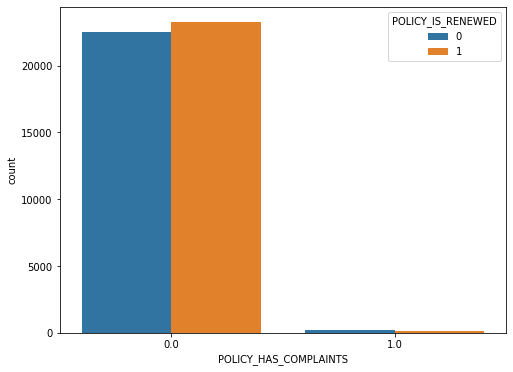

In [ ]:
pd.crosstab(policy_df["POLICY_IS_RENEWED"], policy_df["POLICY_HAS_COMPLAINTS"], margins=True)
sns.countplot(x="POLICY_HAS_COMPLAINTS", hue="POLICY_IS_RENEWED", data=policy_df)

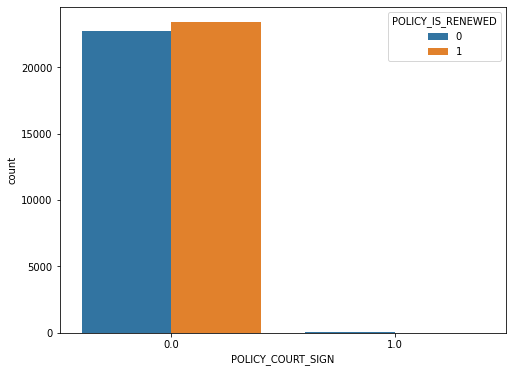

In [ ]:
pd.crosstab(policy_df["POLICY_IS_RENEWED"], policy_df["POLICY_COURT_SIGN"], margins=True)
sns.countplot(x="POLICY_COURT_SIGN", hue="POLICY_IS_RENEWED", data=policy_df)

In [ ]:
policy_df = policy_df.dropna()

train_df = policy_df[policy_df['DATA_TYPE'] == 'TRAIN']
test_df = policy_df[policy_df['DATA_TYPE'] == 'TEST ']

train_y = train_df['POLICY_IS_RENEWED']
test_y = test_df['POLICY_IS_RENEWED']

train_df.drop(['POLICY_IS_RENEWED', 'DATA_TYPE'], axis=1, inplace=True)
test_df.drop(['POLICY_IS_RENEWED', 'DATA_TYPE'], axis=1, inplace=True)

from sklearn.preprocessing import normalize
normal_train_x = normalize(train_df, axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(normal_train_x, train_y)

tree_pred = dtc.predict(test_df)
accuracy_score(test_y, tree_pred)

0.8473547267996531

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(normal_train_x, train_y)

knn_pred = knn.predict(test_df)
accuracy_score(test_y, knn_pred)

1.0

In [ ]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.preprocessing import Binarizer

forest = RandomForestRegressor(n_estimators=10, max_depth=6)
forest.fit(normal_train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_pred = forest.predict(test_df)
forest_pred = forest_pred.reshape(1, -1)
binarizer = Binarizer(threshold=0.7).fit(forest_pred)
binary_pred = binarizer.transform(forest_pred)
accuracy_score(test_y, binary_pred[0])


0.9997831743278404

In [22]:
from sklearn.ensemble.forest import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_depth=6)
forest.fit(normal_train_x, train_y)
forest_pred = forest.predict(test_df)
accuracy_score(test_y, forest_pred)

0.7859930615784909

In [ ]:
import dill as pickle
with open('drive/MyDrive/Colab Notebooks/policy_knn.pk', 'wb') as file:
	pickle.dump(knn, file)

In [ ]:
test_df.to_csv("test_df.csv", index=False)
test_y.to_csv("test_y.csv", index=False)